In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from core.envs.grid_world import *
from core.rl_utils import *

<IPython.core.display.Javascript object>


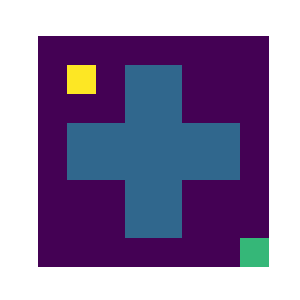

In [2]:
env = Grid_World()
state = env.reset()
for step in range(50):
    action = np.random.randint(4)
    state, reward, done = env.step(action)
    env.render()

## Tabular Q-learning

In [3]:
np.random.seed(123)

num_actions = env.num_actions
Q_table = np.zeros((8, 8, num_actions))

num_episodes = 500
num_steps = 200
epsilon = 1.0
alpha = 0.5
gamma = 0.99

for e in range(num_episodes):
    state = env.reset()
        
    for s in range(num_steps):
        if(np.random.random() <= epsilon):
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q_table[state[0], state[1], :])
        
        next_state, reward, done = env.step(action)

        if(done):
            Q_table[state[0], state[1], action] += alpha * (reward - Q_table[state[0], state[1], action])
            break
        else:
            target = reward + gamma * np.max(Q_table[next_state[0], next_state[1], :])        
            Q_table[state[0], state[1], action] += alpha * (target - Q_table[state[0], state[1], action])
            
        state = next_state.copy()
        
    epsilon = 0.98 * epsilon


<IPython.core.display.Javascript object>


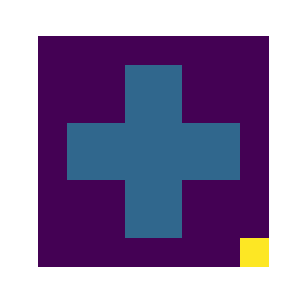

In [4]:
env = Grid_World()
for e in range(20):
    state = env.reset()
    for s in range(50):
        action = np.argmax(Q_table[state[0], state[1], :])
        state, _, done = env.step(action)
        env.render()
        if done:
            break

<IPython.core.display.Javascript object>


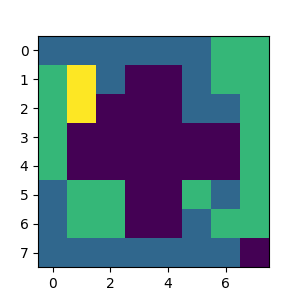

<IPython.core.display.Javascript object>


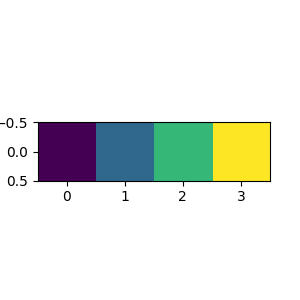

In [6]:
policy = -1*np.ones((8, 8))
for i in range(8):
    for j in range(8):
        policy[i, j] = np.argmax(Q_table[i, j, :])
        
plt.figure(figsize=(3,3))
plt.imshow(policy)

plt.figure(figsize=(3,3))
plt.imshow(np.arange(num_actions).reshape(1, -1));